In [1]:
# For running inference on the TF-Hub module.
import tensorflow as tf
import tensorflow_hub as hub
import time

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO
import requests

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

# functions for drawing
from plot import display_image, download_and_resize_image, draw_bounding_box_on_image, draw_boxes

from model import download_model, load_img, run_detector

# Print Tensorflow version
print(tf.__version__)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

2.10.1
The following GPU devices are available: /device:GPU:0


In [2]:
import cv2 as cv
print(cv.__version__)
import tensorflow as tf
print(tf.__version__)

4.6.0
2.10.1


In [3]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13351510062856049243
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2915486924
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15958285349684968480
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## download model

In [5]:
detector = download_model('mobilenet')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


### exaample

In [6]:
img = np.asarray(load_img('chamonix.png'))

In [9]:
res = run_detector(detector, img, max_boxes=50, min_score=0.2)

Found 100 objects.
Inference time:  0.7633764743804932
Font not found, using default font.


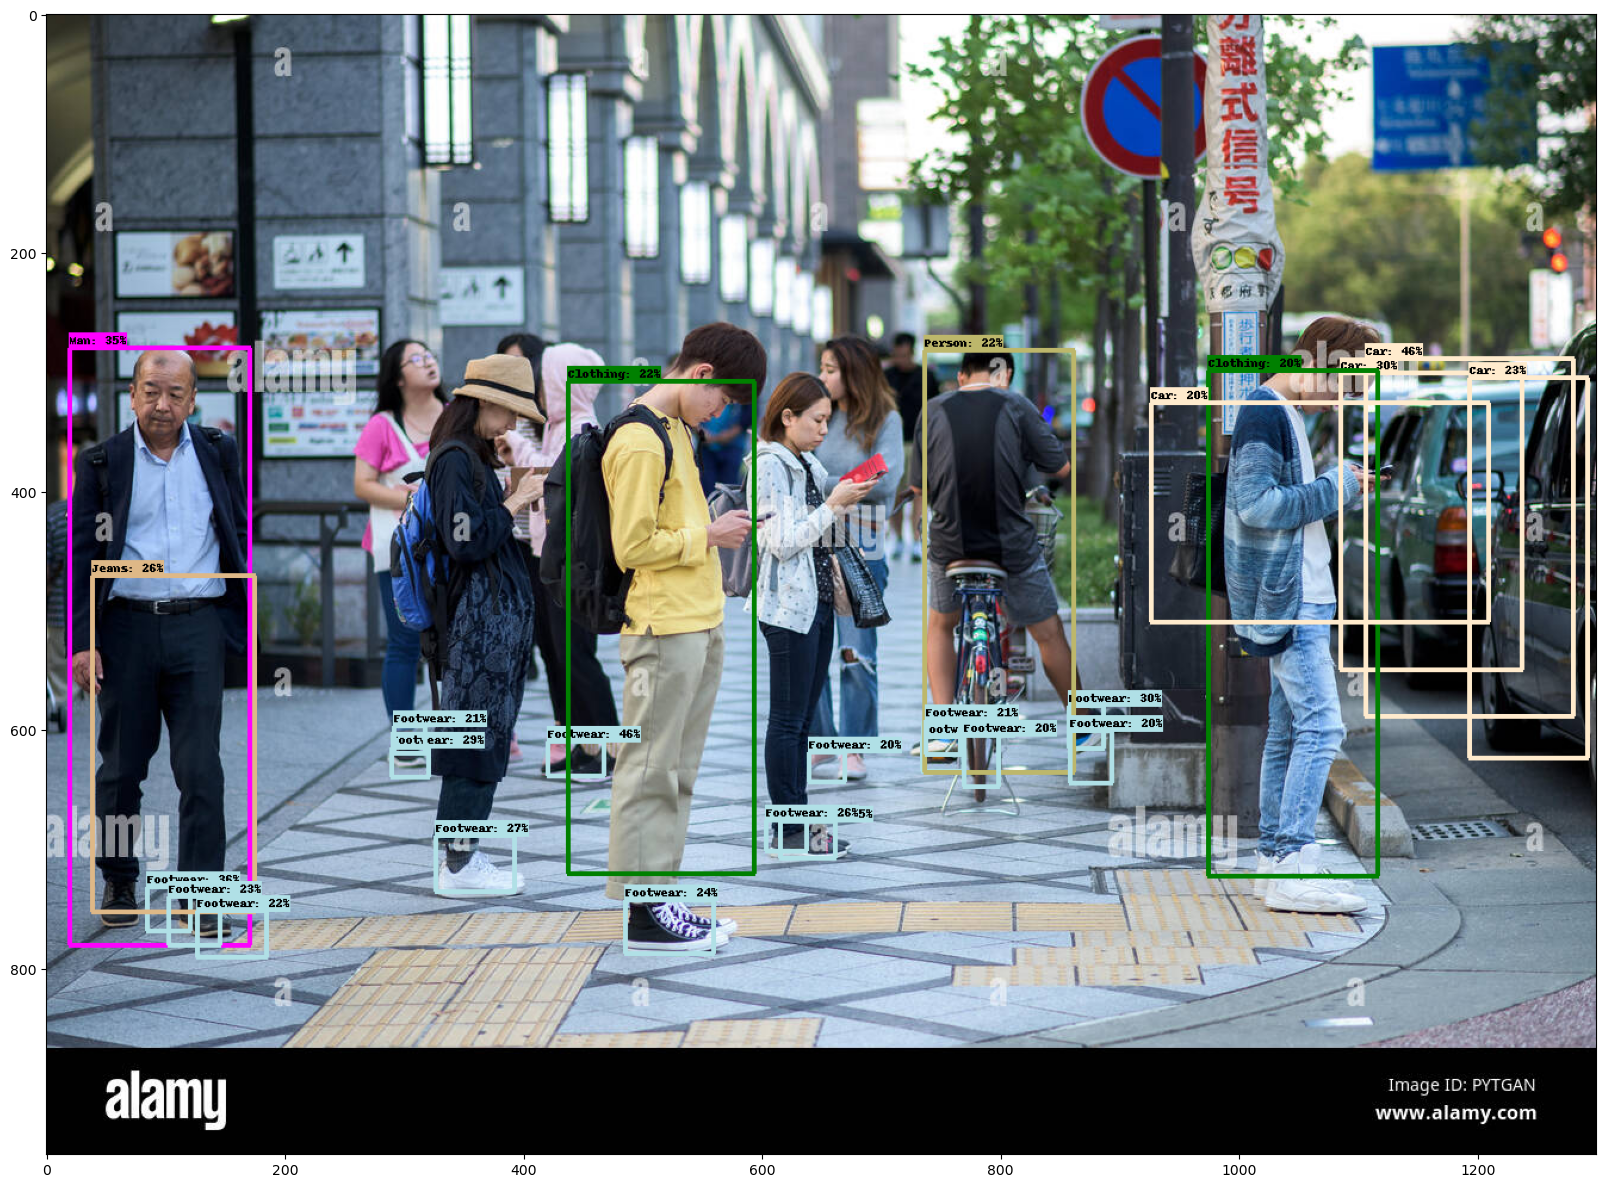

In [10]:
display_image(res)

In [11]:
def detect_img(image_url):
    start_time = time.time()
    image_path = download_and_resize_image(image_url, 640, 480)
    run_detector(detector, image_path)
    end_time = time.time()
    print("Inference time:",end_time-start_time)

## Video

In [12]:
import cv2 # opencv2 package for python.
import pafy # pafy allows us to read videos from youtube.


In [13]:
def video_object_detector(URL=None, show=False, save=True, min_score=0.1, max_boxes=10, plot_info=False):
    
    if URL:
        play = pafy.new(URL).streams[-1] #'-1' means read the lowest quality of video.
        assert play is not None # we want to make sure their is a input to read.
        stream = cv2.VideoCapture(play.url) #create a opencv video stream.
    else:
        stream = cv2.VideoCapture(0)
    
    fps = int(stream.get(2))
    frame_width = int(stream.get(3))
    frame_height = int(stream.get(4))
    
    if save:
        frameSize = (frame_width, frame_height)
        out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, frameSize)
        
    ret = True
    while(ret):
        ret, frame = stream.read()
        
        if ret:
            frame = run_detector(detector, frame, min_score=min_score, max_boxes=max_boxes, plot_info=plot_info)

            if save:
                out.write(frame)

            if show:
                cv2.imshow('frame', frame)

            # the 'q' button is set as the
            # quitting button you may use any
            # desired button of your choice
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    # After the loop release the cap object
    stream.release()
    if save:
        out.release()
    # Destroy all the windows
    cv2.destroyAllWindows()

In [16]:
URL = "https://www.youtube.com/watch?v=-d_iBRRVlVE" #URL to parse
video_object_detector(URL=None, show=True, save=True, min_score=0.1, max_boxes=30)